In [19]:
from vega_datasets import data

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = data.sf_temps()

In [5]:
df.tail()

,temp,date
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00
8758,48.3,2010-12-31 23:00:00


In [9]:
df.date = pd.to_datetime(df.date , format ='%Y-%m-%d %H:%M:%S') # Change date into datetime
df = df.set_index('date') # Set index as the date
df = df.sort_index() # Sort index from earlier to later

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df = df.resample('D').mean() #Resample by day

<AxesSubplot:xlabel='date'>

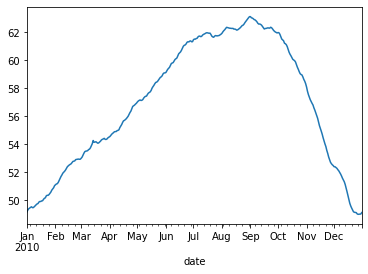

In [18]:
df.temp.plot() #Plot our temperature by date

([<matplotlib.axis.XTick at 0x7fd082054670>,
 [Text(14970.0, 0, 'Minimum Temp'), Text(14852.0, 0, 'Maximum Temp')])

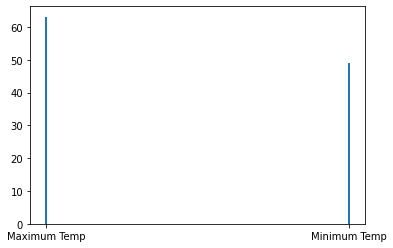

In [25]:
plt.bar([df.temp.idxmin(),df.temp.idxmax()],[df.temp.min(),df.temp.max()])
plt.xticks(ticks=[df.temp.idxmin(),df.temp.idxmax()],labels=['Minimum Temp','Maximum Temp'])

In [30]:
df.temp.resample('M').mean().idxmin().strftime(%m), df.temp.resample('M').mean().min()

SyntaxError: invalid syntax (3020911079.py, line 1)

In [35]:
df.temp.resample('M').mean().idxmin().month #Jan coldest month

1

In [36]:
df.temp.resample('M').mean().idxmax().month #Sep hottest month

9

In [51]:
df_month = df.temp.resample('M').agg(['min', 'max'])


In [62]:
df_month['difference'] = df_month['max']-df_month['min']

In [65]:
df_month.difference.sort_values(ascending=False) #November has the largest difference between min and max temp

date
2010-11-30    5.620833
2010-10-31    3.654167
2010-12-31    3.400000
2010-04-30    2.387500
2010-06-30    2.266667
2010-05-31    2.087500
2010-01-31    1.866667
2010-02-28    1.837500
2010-03-31    1.504167
2010-08-31    1.191667
2010-09-30    1.166667
2010-07-31    0.500000
Name: difference, dtype: float64

In [66]:
df = data.seattle_weather()
df.head() #date already as datetime object

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [71]:
df = df.set_index('date')

In [74]:
df.precipitation.resample('M').sum().sort_values(ascending=False).head() #Dec 2015 received highest precipitation

date
2015-12-31    284.5
2014-03-31    240.0
2015-11-30    212.6
2012-11-30    210.5
2012-03-31    183.0
Name: precipitation, dtype: float64

<AxesSubplot:xlabel='date'>

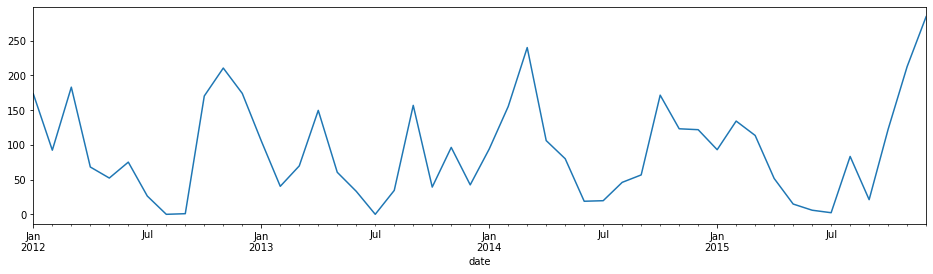

In [80]:
plt.figure(figsize=(16,4))
df.precipitation.resample('M').sum().plot() #  Plotting sum of precipitation per month


<AxesSubplot:xlabel='date'>

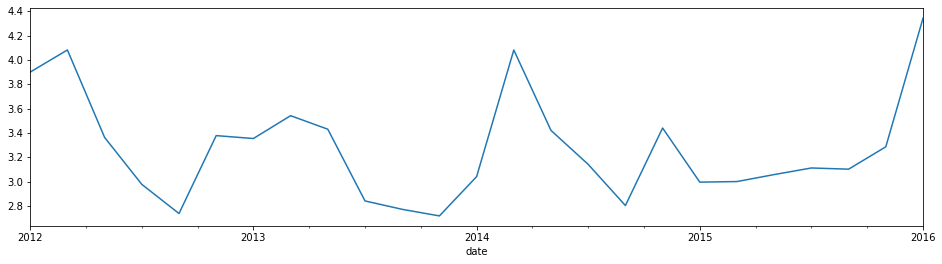

In [85]:
plt.figure(figsize=(16,4))
df.wind.resample('2M').mean().plot() # Plotting average wind per 2 months

In [87]:
df.wind.resample('M').sum().sort_values(ascending=False).head() # Dec 2015 is the windiest month and received
                                                                # highest precipitation

date
2015-12-31    134.6
2012-03-31    131.7
2014-02-28    126.8
2012-01-31    120.9
2014-11-30    119.5
Name: wind, dtype: float64

In [97]:
df_sun = df[df.weather=='sun']
df_sun.weather.resample('M').count().sort_values(ascending=False).head() # July and Aug 2013 both had 27 sunny days

date
2013-08-31    27
2013-07-31    27
2015-06-30    26
2014-07-31    25
2013-06-30    25
Name: weather, dtype: int64

In [99]:
df_rain = df[(df.weather=='rain') | (df.weather=='drizzle')]
df_rain.weather.resample('M').count().sort_values(ascending=False).head() # Nov 2012 had 27 days of rain or drizzle

date
2012-11-30    27
2013-02-28    26
2012-12-31    25
2013-01-31    24
2012-04-30    21
Name: weather, dtype: int64

In [101]:
df[df.precipitation>0]['precipitation'].resample('M').count().sort_values(ascending=False).head()
# Dec 2012 had 27 days of precipitation

date
2012-12-31    27
2015-12-31    25
2012-01-31    22
2012-03-31    22
2015-11-30    20
Name: precipitation, dtype: int64

In [145]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [146]:
df = df.set_index('date')

In [147]:
df.delay = df.delay.fillna(0)

In [125]:
df['hour'] = df.index.strftime('%H')

In [131]:
df.groupby('hour')['delay'].mean().sort_values(ascending=False).head() # Flights at 3 have the highest mean delay

hour
03    302.500000
01    170.000000
00    127.916667
23     64.153846
22     31.200542
Name: delay, dtype: float64

In [136]:
df['day_of_week'] = df.index.strftime('%a')

In [140]:
df.groupby('day_of_week')['delay'].mean().sort_values(ascending=False).head() #Fridays of the most delay

day_of_week
Fri    15.594452
Thu    10.245766
Wed     8.161416
Sun     7.255164
Tue     6.198981
Name: delay, dtype: float64

In [149]:
df['month'] = df.index.strftime('%B')
df.groupby('month')['delay'].mean().sort_values(ascending=False) #February of the most delays

month
February    9.398338
January     8.242630
March       6.804310
Name: delay, dtype: float64